<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/Project_AMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
#Loading the dataset
data=pd.read_csv("/content/Life_expectancy_dataset.csv")
data_unsclaed=data.copy()
data.head()


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
#Dimension of the dataset
data_dim=data.shape
print("The nos of rows in the dataset:- ",data_dim[0])
print("The nos of columns in the dataset:- ",data_dim[1])

The nos of rows in the dataset:-  2938
The nos of columns in the dataset:-  22


In [26]:
data.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [27]:
#Removing spaces from column names
data.columns = data.columns.str.replace(' ', '')
data_unsclaed.columns=data_unsclaed.columns.str.replace(' ','')

In [28]:
#Checking the datatypes of each column in the dataset
data.dtypes

Country                          object
Year                              int64
Status                           object
Life_expectancy                 float64
Adult_Mortality                 float64
infant_deaths                     int64
Alcohol                         float64
percentage_expenditure          float64
Hepatitis_B                     float64
Measles                           int64
BMI                             float64
under_five_deaths                 int64
Polio                           float64
Total_expenditure               float64
Diphtheria                      float64
HIV                             float64
GDP                             float64
Population                      float64
one_nine_thinness               float64
five_nine_thinness              float64
Income_composition_resources    float64
Schooling                       float64
dtype: object

In [29]:
#Checking for null values
data_null=data.isnull().sum()
data_null

Country                           0
Year                              0
Status                            0
Life_expectancy                  10
Adult_Mortality                  10
infant_deaths                     0
Alcohol                         194
percentage_expenditure            0
Hepatitis_B                     553
Measles                           0
BMI                              34
under_five_deaths                 0
Polio                            19
Total_expenditure               226
Diphtheria                       19
HIV                               0
GDP                             448
Population                      652
one_nine_thinness                34
five_nine_thinness               34
Income_composition_resources    167
Schooling                       163
dtype: int64

In [30]:
#dealing with null values for the numerical values

def median_imp(df):
  for column in df.select_dtypes(include=['number']).columns:
    mean_value = df[column].median()
    df[column].fillna(mean_value, inplace=True)

  return df


print(median_imp(data))

          Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0                62     0.01               71

In [31]:
median_imp(data_unsclaed)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [32]:
# Plotting the histogram
# Assuming 'data' is your DataFrame
fig = px.histogram(data, x='Life_expectancy', nbins=20, color_discrete_sequence=['skyblue'], marginal='box')

# Adding labels and title
fig.update_layout(
    xaxis_title='Life Expectancy',
    yaxis_title='Frequency',
    title='Distribution of Life Expectancy'
)

# Display the plot
fig.show()

In [33]:
status_counts = data['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Number of Countries']

fig = px.bar(status_counts, x='Status', y='Number of Countries', color='Status',
             color_discrete_map={'Developing': 'lightgreen', 'Developed': 'lightblue'},
             title='Distribution of Countries based on Status',
             labels={'Status': 'Status', 'Number of Countries': 'Number of Countries'})
fig.show()

In [34]:
fig = px.violin(data, x='Status', y='Life_expectancy', box=True, points="all", color='Status',
                title='Violin Plot: Life Expectancy vs. Status',
                labels={'Status': 'Status (Developed or Developing)', 'Life_expectancy': 'Life Expectancy'})

fig.show()

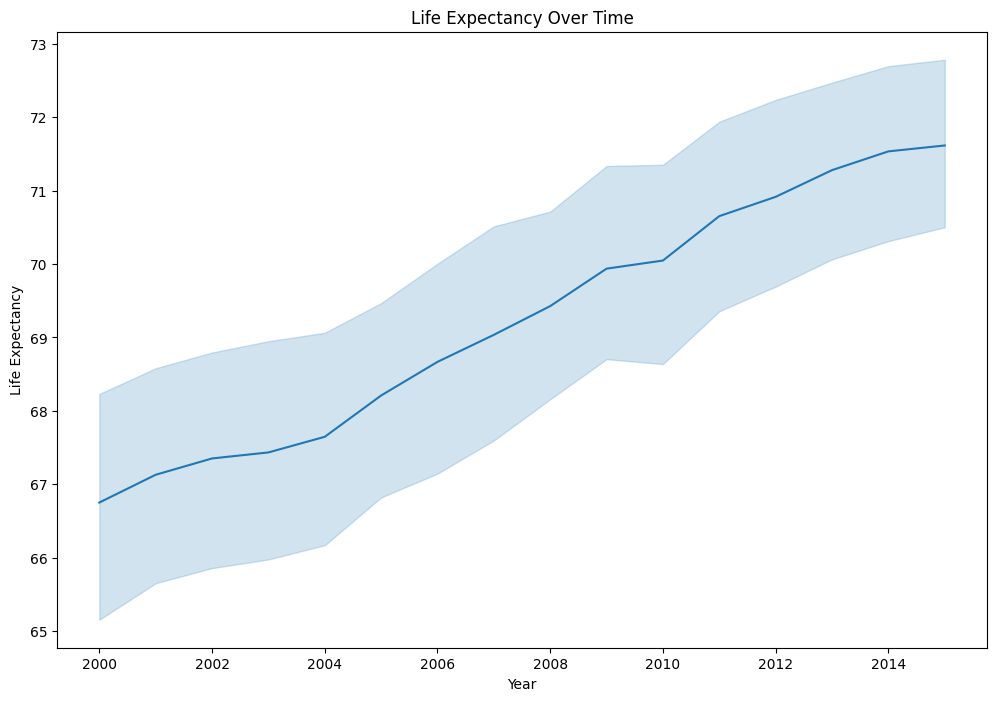

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Life_expectancy', data=data)
plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

In [36]:
#checking for numerical columns
def check_num_columns(df):
  num_col=[]
  for col in df:
    if df[col].dtypes =='int' or df[col].dtypes =='float':
      num_col.append(col)

  return num_col


numerical_columns=check_num_columns(data)
print("The numerical are as follows:- ")
print(numerical_columns)

The numerical are as follows:- 
['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV', 'GDP', 'Population', 'one_nine_thinness', 'five_nine_thinness', 'Income_composition_resources', 'Schooling']


In [37]:
#Outlier Detection
OD_data=data.drop(['Country','Status'],axis=1)
for col in OD_data.columns:
    fig = px.box(OD_data, y=col, title=f'Boxplot of {col}')
    fig.show()

In [38]:
#Detecting  the outliers
numerical_cols=data.drop(['Country', 'Status'], axis=1)
zscore_data=numerical_cols.apply(zscore)
outlier_rows=(zscore_data > 3) | (zscore_data < -3)
total_nos_outliers=outlier_rows.sum()


print("Number of outliers in each column are as follows:- ")
print(total_nos_outliers)

Number of outliers in each column are as follows:- 
Year                              0
Life_expectancy                   2
Adult_Mortality                  40
infant_deaths                    37
Alcohol                           5
percentage_expenditure           84
Hepatitis_B                     168
Measles                          48
BMI                               0
under_five_deaths                34
Polio                           172
Total_expenditure                27
Diphtheria                      170
HIV                              69
GDP                              96
Population                       24
one_nine_thinness                54
five_nine_thinness               57
Income_composition_resources    130
Schooling                        28
dtype: int64


In [39]:
#Removal Of Outliers
data_1=data[~outlier_rows.any(axis=1)]
for i in data_1:
    if data_1[i].isnull().any():
        print("Null Values Still Exist in column:", i)
    else:
        print("No Null Values in column:", i)

print('---------------------------------------------')
print("Shape after removing outliers:", data_1.shape)

No Null Values in column: Country
No Null Values in column: Year
No Null Values in column: Status
No Null Values in column: Life_expectancy
No Null Values in column: Adult_Mortality
No Null Values in column: infant_deaths
No Null Values in column: Alcohol
No Null Values in column: percentage_expenditure
No Null Values in column: Hepatitis_B
No Null Values in column: Measles
No Null Values in column: BMI
No Null Values in column: under_five_deaths
No Null Values in column: Polio
No Null Values in column: Total_expenditure
No Null Values in column: Diphtheria
No Null Values in column: HIV
No Null Values in column: GDP
No Null Values in column: Population
No Null Values in column: one_nine_thinness
No Null Values in column: five_nine_thinness
No Null Values in column: Income_composition_resources
No Null Values in column: Schooling
---------------------------------------------
Shape after removing outliers: (2177, 22)


In [40]:
#Concat the num values
for col in numerical_columns:
  data=data.drop([col],axis=1)

#Dropping the Columns present in both df's to ensure that there is no duplicate columns
data_1=data_1.drop(['Country','Status'],axis=1)
data_1

#Concatenating the 2 Df's(i.e the categorical data as well as the numerical data)
data=pd.concat([data, data_1], axis=1)

#Checking for null values in the the combined  Df
data.isnull().sum()

Country                           0
Status                            0
Year                            761
Life_expectancy                 761
Adult_Mortality                 761
infant_deaths                   761
Alcohol                         761
percentage_expenditure          761
Hepatitis_B                     761
Measles                         761
BMI                             761
under_five_deaths               761
Polio                           761
Total_expenditure               761
Diphtheria                      761
HIV                             761
GDP                             761
Population                      761
one_nine_thinness               761
five_nine_thinness              761
Income_composition_resources    761
Schooling                       761
dtype: int64

In [41]:
#Replacing the null values with mean value
print(median_imp(data))

          Country      Status    Year  Life_expectancy  Adult_Mortality  \
0     Afghanistan  Developing  2008.0             72.7            139.0   
1     Afghanistan  Developing  2014.0             59.9            271.0   
2     Afghanistan  Developing  2013.0             59.9            268.0   
3     Afghanistan  Developing  2012.0             59.5            272.0   
4     Afghanistan  Developing  2008.0             72.7            139.0   
...           ...         ...     ...              ...              ...   
2933     Zimbabwe  Developing  2008.0             72.7            139.0   
2934     Zimbabwe  Developing  2008.0             72.7            139.0   
2935     Zimbabwe  Developing  2008.0             72.7            139.0   
2936     Zimbabwe  Developing  2008.0             72.7            139.0   
2937     Zimbabwe  Developing  2008.0             72.7            139.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0               3.0  

In [42]:
#Plotting the distribution to check if datascaling needs to be done
for col in data.columns:
    fig = px.histogram(data, x=col, nbins=30, color_discrete_sequence=['skyblue'], marginal='box')

    fig.update_layout(
        xaxis_title='Values',
        yaxis_title='Frequency',
        title=f'Basic Histogram of {col}'
    )

    fig.show()

In [43]:
#Separating the columns that are not required from the main dataset
x=data[['Total_expenditure','Schooling','Year']]
data=data.drop(['Schooling','Total_expenditure','Year'],axis=1)

In [44]:
#Data Scaling
for col in data.select_dtypes(include=['number']).columns:
  scaler=StandardScaler()
  scaler.fit(data[[col]])
  data[[col]]=scaler.transform(data[[col]])

data.head()

,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources
0,Afghanistan,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,0.222417,-0.245865,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
1,Afghanistan,Developing,-1.459680,1.308035,2.121430,-1.279949,-0.330160,-2.336829,-0.083187,-1.317636,1.980840,-2.547738,-2.142573,-0.334712,-0.490017,-0.356701,4.230979,4.181767,-1.507830
2,Afghanistan,Developing,-1.459680,1.275610,2.201827,-1.279949,-0.330493,-2.166213,-0.104112,-1.346757,2.065010,-2.226421,-1.987092,-0.334712,-0.487452,2.049724,4.294373,4.244474,-1.553914
3,Afghanistan,Developing,-1.513056,1.318843,2.322423,-1.279949,-0.325053,-1.910288,0.691393,-1.375878,2.177236,-1.824774,-1.753870,-0.334712,-0.482307,-0.098514,4.357767,4.338535,-1.607679
4,Afghanistan,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,0.222417,-0.245865,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153


In [45]:
#Concatenating the df's
data=pd.concat([x, data], axis=1)
data

,Total_expenditure,Schooling,Year,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,BMI,under_five_deaths,Polio,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources
0,5.755,12.4,2008.0,Afghanistan,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
1,8.180,10.0,2014.0,Afghanistan,Developing,-1.459680,1.308035,2.121430,-1.279949,-0.330160,...,-1.317636,1.980840,-2.547738,-2.142573,-0.334712,-0.490017,-0.356701,4.230979,4.181767,-1.507830
2,8.130,9.9,2013.0,Afghanistan,Developing,-1.459680,1.275610,2.201827,-1.279949,-0.330493,...,-1.346757,2.065010,-2.226421,-1.987092,-0.334712,-0.487452,2.049724,4.294373,4.244474,-1.553914
3,8.520,9.8,2012.0,Afghanistan,Developing,-1.513056,1.318843,2.322423,-1.279949,-0.325053,...,-1.375878,2.177236,-1.824774,-1.753870,-0.334712,-0.482307,-0.098514,4.357767,4.338535,-1.607679
4,5.755,12.4,2008.0,Afghanistan,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,5.755,12.4,2008.0,Zimbabwe,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
2934,5.755,12.4,2008.0,Zimbabwe,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
2935,5.755,12.4,2008.0,Zimbabwe,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
2936,5.755,12.4,2008.0,Zimbabwe,Developing,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153


In [46]:
#Dropping the nul values
data=data.dropna()

In [47]:
#Encoding

#Label Encoder
l_encoder=LabelEncoder()
data['Status']=l_encoder.fit_transform(data['Status'])
data['Country']=l_encoder.fit_transform(data['Country'])
data_unsclaed['Status']=l_encoder.fit_transform(data['Status'])
data_unsclaed['Country']=l_encoder.fit_transform(data['Country'])


In [48]:
#Printing the final dataset where data  scaling has not been applied
data.head()

,Total_expenditure,Schooling,Year,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,BMI,under_five_deaths,Polio,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources
0,5.755,12.4,2008.0,0,1,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
1,8.180,10.0,2014.0,0,1,-1.459680,1.308035,2.121430,-1.279949,-0.330160,...,-1.317636,1.980840,-2.547738,-2.142573,-0.334712,-0.490017,-0.356701,4.230979,4.181767,-1.507830
2,8.130,9.9,2013.0,0,1,-1.459680,1.275610,2.201827,-1.279949,-0.330493,...,-1.346757,2.065010,-2.226421,-1.987092,-0.334712,-0.487452,2.049724,4.294373,4.244474,-1.553914
3,8.520,9.8,2012.0,0,1,-1.513056,1.318843,2.322423,-1.279949,-0.325053,...,-1.375878,2.177236,-1.824774,-1.753870,-0.334712,-0.482307,-0.098514,4.357767,4.338535,-1.607679
4,5.755,12.4,2008.0,0,1,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153


In [49]:
#Printing the final dataset where data  scaling has  been applied
data.head()

,Total_expenditure,Schooling,Year,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,BMI,under_five_deaths,Polio,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources
0,5.755,12.4,2008.0,0,1,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
1,8.180,10.0,2014.0,0,1,-1.459680,1.308035,2.121430,-1.279949,-0.330160,...,-1.317636,1.980840,-2.547738,-2.142573,-0.334712,-0.490017,-0.356701,4.230979,4.181767,-1.507830
2,8.130,9.9,2013.0,0,1,-1.459680,1.275610,2.201827,-1.279949,-0.330493,...,-1.346757,2.065010,-2.226421,-1.987092,-0.334712,-0.487452,2.049724,4.294373,4.244474,-1.553914
3,8.520,9.8,2012.0,0,1,-1.513056,1.318843,2.322423,-1.279949,-0.325053,...,-1.375878,2.177236,-1.824774,-1.753870,-0.334712,-0.482307,-0.098514,4.357767,4.338535,-1.607679
4,5.755,12.4,2008.0,0,1,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153


###Supervised Learning Models

In [50]:
#Splitting the dataset- Scaled data

X=data.drop(['Life_expectancy'],axis=1)
y=data['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
#Splitting the dataset- Unscaled data

X=data_unsclaed.drop(['Life_expectancy'],axis=1)
y=data_unsclaed['Life_expectancy']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.3, random_state=42)

##Linear Regression

In [52]:
#Model 1

model=LinearRegression()
model.fit(X_train, y_train)


y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_mse_model1 = mean_squared_error(y_train, y_train_pred)
test_mse_model1= mean_squared_error(y_test, y_test_pred)

print("Training  Mean Squared Error :", train_mse_model1)
print("Testing  Mean Squared Error :", test_mse_model1)

train_r2_model1= r2_score(y_train, y_train_pred)
test_r2_model1= r2_score(y_test, y_test_pred)

print("The r square value for the Training half is :", train_r2_model1)
print("The r square value for the Testing  half is ", test_r2_model1)

Training  Mean Squared Error : 0.14728002184585437
Testing  Mean Squared Error : 0.13858947229068866
The r square value for the Training half is : 0.8504756204965247
The r square value for the Testing  half is  0.8658605224801151


In [53]:
model_sample=LinearRegression()
model_sample.fit(X_train_s, y_train_s)




LinearRegression()

In [55]:
#User input model - 1
Total_expenditure = float(input("Total_expenditure: "))
Schooling = float(input("Schooling: "))
Year = float(input("Year : "))
Country = float(input("Country : "))
Status = float(input("Status: "))
Adult_Mortality = float(input("Adult_Mortality: "))
infant_deaths = float(input("infant_deaths: "))
Alcohol = float(input("Alcohol: "))
percentage_expenditure = float(input("percentage_expenditure: "))
Hepatitis_B = float(input("Hepatitis_B : "))
Measles = float(input("Measles: "))
BMI = float(input("BMI: "))
under_five_deaths = float(input("under_five_deaths: "))
Polio = float(input("Polio: "))
Diphtheria = float(input("Diphtheria: "))
HIV = float(input("HIV: "))
GDP = float(input("GDP: "))
Population = float(input("Population: "))
one_nine_thinness = float(input("one_nine_thinness : "))
five_nine_thinness = float(input("five_nine_thinness: "))
Income_composition_resources= float(input("Income_composition_resources: "))

Total_expenditure: 8.16
Schooling: 10.1
Year : 2014
Country : 0
Status: 0
Adult_Mortality: 263
infant_deaths: 62
Alcohol: 0.01
percentage_expenditure: 71.279
Hepatitis_B : 65
Measles: 1154
BMI: 19.1
under_five_deaths: 83
Polio: 6
Diphtheria: 65
HIV: 0.1
GDP: 584.25
Population: 33736494
one_nine_thinness : 17.2
five_nine_thinness: 17.3
Income_composition_resources: 0.479


In [56]:
data_model1 = np.array([[Country, Year, Status,
                        Adult_Mortality, infant_deaths, Alcohol,
                        percentage_expenditure, Hepatitis_B, Measles,
                        BMI, under_five_deaths, Polio, Total_expenditure,
                        Diphtheria, HIV, GDP, Population,
                        one_nine_thinness, five_nine_thinness,
                        Income_composition_resources, Schooling]])

prediction = model_sample.predict(data_model1)

print("The expected Life Expectancy is:" )
print(prediction)
print('-------------------------------------------------------')


The expected Life Expectancy is:
[62.81087203]
-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



#Random forest Regressor

In [57]:
#Model 2
model_2 = RandomForestRegressor( n_estimators=100,random_state=42)
model_2.fit(X_train, y_train)


y_train_pred=model_2.predict(X_train)
y_test_pred=model_2.predict(X_test)



train_mse_model_2=mean_squared_error(y_train, y_train_pred)
train_rmse_model_2=np.sqrt(train_mse_model_2)
train_r2_model_2=r2_score(y_train, y_train_pred)


test_mse_model_2=mean_squared_error(y_test, y_test_pred)
test_rmse_model_2=np.sqrt(test_mse_model_2)
test_r2_model_2=r2_score(y_test, y_test_pred)


print("Training Mean Squared Error (RMSE):", train_mse_model_2)
print("Training R^2:", train_r2_model_2)

print("\nTesting Mean Squared Error (RMSE):", test_rmse_model_2)
print("Testing R^2:", test_r2_model_2)

Training Mean Squared Error (RMSE): 0.0071170371872858644
Training R^2: 0.9927745083413563

Testing Mean Squared Error (RMSE): 0.19910472698390724
Testing R^2: 0.9616302021669151


In [58]:
model_sample2=RandomForestRegressor(n_estimators=100,random_state=42)
model_sample2.fit(X_train_s, y_train_s)

RandomForestRegressor(random_state=42)

In [59]:
data_model2 = np.array([[Country, Year, Status,
                        Adult_Mortality, infant_deaths, Alcohol,
                        percentage_expenditure, Hepatitis_B, Measles,
                        BMI, under_five_deaths, Polio, Total_expenditure,
                        Diphtheria, HIV, GDP, Population,
                        one_nine_thinness, five_nine_thinness,
                        Income_composition_resources, Schooling]])

prediction = model_sample2.predict(data_model2)

print("The expected Life Expectancy is:" )
print(prediction)
print('-------------------------------------------------------')


The expected Life Expectancy is:
[64.112]
-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



#XGBoost

In [60]:
#model 3
model_3=xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
model_3.fit(X_train, y_train)

y_train_pred=model_3.predict(X_train)

# Make predictions on the test set
y_test_pred=model_3.predict(X_test)

# Evaluate the model on training data
train_rmse_model_3=np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2_model_3=r2_score(y_train, y_train_pred)

# Evaluate the model on test data
test_rmse_model_3=np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2_model_3=r2_score(y_test, y_test_pred)

# Print the performance metrics for training data
print("Training Root Mean Squared Error (RMSE):", train_rmse_model_3)
print("Training R^2:", train_r2_model_3)

# Print the performance metrics for test data
print("\nTesting Root Mean Squared Error (RMSE):", test_rmse_model_3)
print("Testing R^2:", test_r2_model_3)

Training Root Mean Squared Error (RMSE): 0.018284982584224584
Training R^2: 0.9996605644923681

Testing Root Mean Squared Error (RMSE): 0.2079160375944221
Testing R^2: 0.9581589717230392


In [61]:
data_model1=np.array([[Total_expenditure, Schooling, Year, Country, Status,
                      Adult_Mortality, infant_deaths, Alcohol, percentage_expenditure,
                      Hepatitis_B, Measles, BMI, under_five_deaths, Polio, Diphtheria,
                      HIV, GDP, Population, one_nine_thinness, five_nine_thinness,
                      Income_composition_resources]])
prediction=model_3.predict(data_model1)

print("The expected Life Expectancy is: - ",prediction)
print('-------------------------------------------------------')

The expected Life Expectancy is: -  [-1.3185244]
-------------------------------------------------------


In [62]:
import plotly.graph_objects as go

# R-squared values for three models
model_names = ['Model 1', 'Model 2', 'Model 3']
r_squared_values = [test_r2_model1, test_r2_model_2, test_r2_model_3]

# Create a bar graph
fig = go.Figure(data=[go.Bar(x=model_names, y=r_squared_values, text=r_squared_values, textposition='auto')])

# Customize the layout
fig.update_layout(
    title='Comparison of R-squared Values',
    xaxis=dict(title='Models'),
    yaxis=dict(title='R-squared'),
    bargap=0.2,
)

# Show the plot
fig.show()


#Unsupervised Learning

In [63]:
#Removing the labels of the dataset
data=data[:].values
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,5.755,12.4,2008.0,0.0,1.0,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
1,8.180,10.0,2014.0,0.0,1.0,-1.459680,1.308035,2.121430,-1.279949,-0.330160,...,-1.317636,1.980840,-2.547738,-2.142573,-0.334712,-0.490017,-0.356701,4.230979,4.181767,-1.507830
2,8.130,9.9,2013.0,0.0,1.0,-1.459680,1.275610,2.201827,-1.279949,-0.330493,...,-1.346757,2.065010,-2.226421,-1.987092,-0.334712,-0.487452,2.049724,4.294373,4.244474,-1.553914
3,8.520,9.8,2012.0,0.0,1.0,-1.513056,1.318843,2.322423,-1.279949,-0.325053,...,-1.375878,2.177236,-1.824774,-1.753870,-0.334712,-0.482307,-0.098514,4.357767,4.338535,-1.607679
4,5.755,12.4,2008.0,0.0,1.0,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,5.755,12.4,2008.0,192.0,1.0,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
2934,5.755,12.4,2008.0,192.0,1.0,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
2935,5.755,12.4,2008.0,192.0,1.0,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153
2936,5.755,12.4,2008.0,192.0,1.0,0.248354,-0.118675,-0.330688,-0.176597,-0.333427,...,0.260719,-0.347862,0.344120,0.345122,-0.334712,-0.334592,-0.275556,-0.269985,-0.270443,0.128153


In [64]:
#Model-4
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sse=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)



fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=sse, mode='lines+markers', marker=dict(size=8, symbol='circle'),
                         line=dict(color='blue', width=2)))

fig.update_layout(
    title='Elbow Method for Optimal k',
    xaxis=dict(title='Number of Clusters (k)'),
    yaxis=dict(title='Distortion'),
    showlegend=False
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [65]:
#Building the model with optimal k
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data )

cluster_labels = kmeans.labels_



In [66]:
# Count data points in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print("Data points in each cluster:")
print(cluster_counts)

df_cluster_counts=pd.DataFrame({'Cluster': cluster_counts.index, 'Count': cluster_counts.values})
#Graph
fig = px.bar(df_cluster_counts, x='Cluster', y='Count', labels={'Cluster': 'Cluster', 'Count': 'Data Points Count'},
             title='Data Points in Each Cluster')
fig.show()

Data points in each cluster:
0    434
1    402
2    448
3    451
4    402
5    369
6    432
dtype: int64


In [67]:
fig = go.Figure(data=[go.Scatter3d(x=data.iloc[:, 0], y=data.iloc[:, 1], z=data.iloc[:, 2], mode='markers',
                                   marker=dict(color=cluster_labels, size=6, opacity=0.3),
                                   text=cluster_labels.tolist())])

fig.update_layout(
    title='K-Means Clustering',
    scene=dict(
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        zaxis=dict(title='Feature 3')
    )
)

fig.show()